# TP Final - Redes Neuronales Convolucionales
## Mellino, Natalia - Introducción al Aprendizaje Automatizado

In [1]:
# Imports

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
def graficar_resultados(history, model, title):
  # Calculamos el error a partir del accuracy para poder graficar
  train_error = list(map(lambda x: 1 - x, history.history['accuracy']))
  val_error = list(map(lambda x: 1 - x,  history.history['val_accuracy']))

  xs = list(range(1, len(train_error) + 1))

  # Graficamos
  plt.plot(xs, train_error, label='Train Error')
  plt.plot(xs, val_error, label = 'Val Error')
  plt.xlabel('Epoca')
  plt.ylabel('Error')
  plt.legend()
  plt.title(title)
  plt.show()

  # Error de test

  (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
  # Normalize pixel values to be between 0 and 1
  train_images, test_images = train_images / 255.0, test_images / 255.0
  test_loss, test_acc = model.evaluate(test_images,  test_labels)
  print(f"Test error en el modelo final: {1 - test_acc}")

## Ejercicio 1

In [ ]:
def ej1(model):

  (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

  # Normalizamos como lo hace el ejemplo del tutorial
  train_images, test_images = train_images / 255.0, test_images / 255.0


  # Separamos conjunto de validación
  train_images, val_images, train_labels, val_labels = train_test_split(
      train_images, train_labels, test_size=0.2, random_state=0
  )

  # Compilamos y entrenamos

  model.compile(
      optimizer='adam',
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy']
  )

  history = model.fit(
      train_images, 
      train_labels, 
      epochs=10, 
      validation_data=(val_images, val_labels)
  )

  return history, model

In [ ]:
# Agregamos las capas
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(64))
model1.add(layers.Dense(128))
model1.add(layers.Dense(128))
model1.add(layers.Dense(10))

history1, model1 = ej1(model1)

Epoch 1/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5149 - accuracy: 0.4418 - val_loss: 1.1985 - val_accuracy: 0.5771
Epoch 2/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.1222 - accuracy: 0.6001 - val_loss: 1.0246 - val_accuracy: 0.6378
Epoch 3/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.9404 - accuracy: 0.6672 - val_loss: 0.9508 - val_accuracy: 0.6660
Epoch 4/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8252 - accuracy: 0.7079 - val_loss: 0.9101 - val_accuracy: 0.6824
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7322 - accuracy: 0.7409 - val_loss: 0.8578 - val_accuracy: 0.6999
Epoch 6/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.6523 - accuracy: 0.7698 - val_loss: 0.9439 - val_accuracy: 0.6777
Epoch 7/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.5858 - accuracy: 0.7927 - val_loss: 0.8910 - val_accuracy:

### Resultados

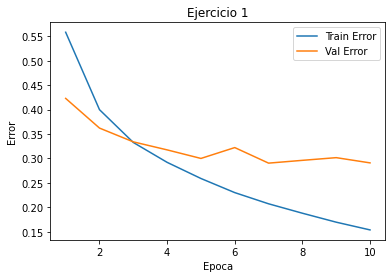

313/313 [==============================] - 1s 3ms/step - loss: 0.9999 - accuracy: 0.7081
Test error en el modelo final: 0.29189997911453247


In [ ]:
graficar_resultados(history1, model1, 'Ejercicio 1')


### Conclusiones

Se logró un error de test de aproximadamente 0.29, pero podemos ver en la gráfica que ya en las primeras épocas comienza a haber un claro overfitting. Es posible que el diseño de esta red no sea el más adecuado para resolver este problema.

## Ejercicio 2

In [6]:
def ej2(models):
  results = []
  for model in models:

    (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

    # Normalizamos como lo hace el ejemplo del tutorial
    train_images, test_images = train_images / 255.0, test_images / 255.0


    # Separamos conjunto de validación
    train_images, val_images, train_labels, val_labels = train_test_split(
        train_images, train_labels, test_size=0.2, random_state=0
    )

    # Compilamos y entrenamos

    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )

    history = model.fit(
        train_images, 
        train_labels, 
        epochs=20,
        validation_data=(val_images, val_labels)
    )

    results.append((history, model))

  return results

In [7]:
ms2 = []
for p in [0.2, 0.5]:
    # Agregamos las capas
    model2 = models.Sequential()
    model2.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model2.add(layers.MaxPooling2D((2, 2)))
    model2.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model2.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model2.add(layers.MaxPooling2D((2, 2)))
    model2.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model2.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model2.add(layers.Dropout(p, input_shape=(32, 32, 3))) # Dropout
    model2.add(layers.Flatten())
    model2.add(layers.Dense(64))
    model2.add(layers.Dropout(p, input_shape=(32, 32, 3))) # Dropout
    model2.add(layers.Dense(128))
    model2.add(layers.Dense(128))
    model2.add(layers.Dense(10))

    ms2.append(model2)

results2 = ej2(ms2)

Epoch 1/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.5779 - accuracy: 0.4181 - val_loss: 1.2263 - val_accuracy: 0.5556
Epoch 2/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1770 - accuracy: 0.5811 - val_loss: 1.0618 - val_accuracy: 0.6335
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0011 - accuracy: 0.6478 - val_loss: 0.9496 - val_accuracy: 0.6647
Epoch 4/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8965 - accuracy: 0.6855 - val_loss: 1.0436 - val_accuracy: 0.6394
Epoch 5/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8212 - accuracy: 0.7110 - val_loss: 0.9278 - val_accuracy: 0.6797
Epoch 6/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7626 - accuracy: 0.7349 - val_loss: 0.8729 - val_accuracy: 0.6965
Epoch 7/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7145 - accuracy: 0.7487 - val_loss: 0.8499 - val_accuracy:

### Resultados

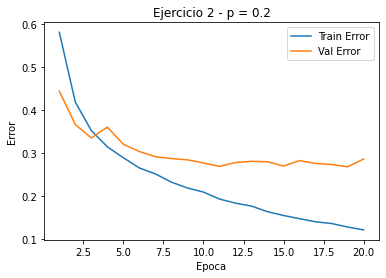

313/313 [==============================] - 1s 3ms/step - loss: 1.0416 - accuracy: 0.7102
Test error en el modelo final: 0.2897999882698059


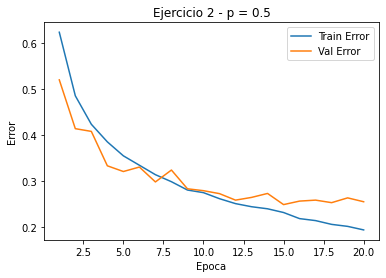

313/313 [==============================] - 1s 3ms/step - loss: 0.8302 - accuracy: 0.7393
Test error en el modelo final: 0.260699987411499


In [8]:
# p = 0.2

history2a, model2a = results2[0]
graficar_resultados(history2a, model2a, 'Ejercicio 2 - p = 0.2')

history2b, model2b = results2[1]
graficar_resultados(history2b, model2b, 'Ejercicio 2 - p = 0.5')



### Conclusiones

Podemos ver claramente que con p = 0.2 hay un claro overfitting mientras que con p = 0.5 se reduce drásticamente. Aún así, para p = 0.5, se puede ver al final, en las últimas épocas, que las curvas comienzan a diverger lentamente. Restaría probar entrenar nuevamente con más épocas para constatar si esto efectivamente sucede así. En conclusión, nos quedamos con el valor de p = 0.5 como el óptimo, ya que tiene mucho menos overfitting y el valor del error en test es un poco mejor (en aproximadamente un 2%).

## Ejercicio 3

In [3]:
def ej3(model):

  (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

  # Normalizamos como lo hace el ejemplo del tutorial
  train_images, test_images = train_images / 255.0, test_images / 255.0


  # Separamos conjunto de validación
  train_images, val_images, train_labels, val_labels = train_test_split(
      train_images, train_labels, test_size=0.2, random_state=0
  )

  # Compilamos y entrenamos

  model.compile(
      optimizer='adam',
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy']
  )

  history = model.fit(
      train_images, 
      train_labels, 
      epochs=40,
      validation_data=(val_images, val_labels)
  )

  return history, model

In [4]:
img_height = 32
img_width = 32
data_augmentation = keras.Sequential(
    [
          layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
          layers.RandomRotation(0.1),
          layers.RandomZoom(0.1),
     ]
)

# Agregamos las capas
model3 = models.Sequential()
model3.add(data_augmentation)
model3.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model3.add(layers.Dropout(0.5, input_shape=(32, 32, 3))) # Dropout
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(64))
model3.add(layers.Dropout(0.5, input_shape=(32, 32, 3))) # Dropout
model3.add(layers.Dense(128))
model3.add(layers.Dense(128))
model3.add(layers.Dense(10))

history3, mdl3 = ej3(model3)

170508288/170498071 [==============================] - 3s 0us/step
Epoch 1/40
1250/1250 [==============================] - 20s 6ms/step - loss: 1.7921 - accuracy: 0.3355 - val_loss: 1.5239 - val_accuracy: 0.4605
Epoch 2/40
1250/1250 [==============================] - 7s 6ms/step - loss: 1.5457 - accuracy: 0.4341 - val_loss: 1.4319 - val_accuracy: 0.4962
Epoch 3/40
1250/1250 [==============================] - 7s 6ms/step - loss: 1.4591 - accuracy: 0.4699 - val_loss: 1.3395 - val_accuracy: 0.5312
Epoch 4/40
1250/1250 [==============================] - 8s 7ms/step - loss: 1.3939 - accuracy: 0.4959 - val_loss: 1.2389 - val_accuracy: 0.5650
Epoch 5/40
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3492 - accuracy: 0.5167 - val_loss: 1.2261 - val_accuracy: 0.5809
Epoch 6/40
1250/1250 [==============================] - 7s 6ms/step - loss: 1.3137 - accuracy: 0.5303 - val_loss: 1.1745 - val_accuracy: 0.6069
Epoch 7/40
1250/1250 [==============================] - 8s 6ms/step 

### Resultados

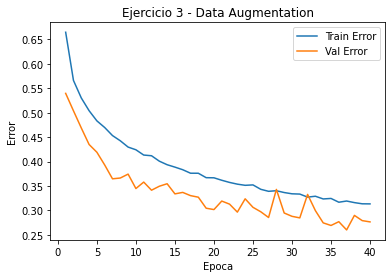

313/313 [==============================] - 1s 3ms/step - loss: 0.8191 - accuracy: 0.7223
Test error en el modelo final: 0.2777000069618225


In [5]:
graficar_resultados(history3, mdl3, 'Ejercicio 3 - Data Augmentation')

### Conclusiones

Hay menos sobreajuste ya que en esta gráfica las curvas se ven más 'similares', más allá de que la curva de validación presenta más 'picos' que la de entrenamiento. Sin embargo, no se ven mejoras en el error. En el ejercicio anterior vimos un error del 0.26 en test y acá vemos un error de aproximadamente 0.31. Por lo que indica que la capa de data augmentation no funcionó muy bien para reducir el error, pero si para el overfitting.

TODO: probar de usar 40 épocas en vez de 20

## Ejercicio 4

### Ejercicio 1 mejorado

In [ ]:
model = tf.keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
# model.add(layers.Dense(64))
# model.add(layers.Dense(128))
model.add(layers.Dense(128))
model.add(layers.Dense(10))

history, mdl = ej1(model)

Epoch 1/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5183 - accuracy: 0.4457 - val_loss: 1.1825 - val_accuracy: 0.5829
Epoch 2/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.0334 - accuracy: 0.6346 - val_loss: 0.9254 - val_accuracy: 0.6721
Epoch 3/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8446 - accuracy: 0.7009 - val_loss: 0.9284 - val_accuracy: 0.6781
Epoch 4/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.7234 - accuracy: 0.7468 - val_loss: 0.8003 - val_accuracy: 0.7204
Epoch 5/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.6360 - accuracy: 0.7753 - val_loss: 0.7753 - val_accuracy: 0.7273
Epoch 6/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.5519 - accuracy: 0.8053 - val_loss: 0.8334 - val_accuracy: 0.7139
Epoch 7/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.4814 - accuracy: 0.8284 - val_loss: 0.8851 - val_accuracy:

### Resultados - Ejercicio 1 Mejorado

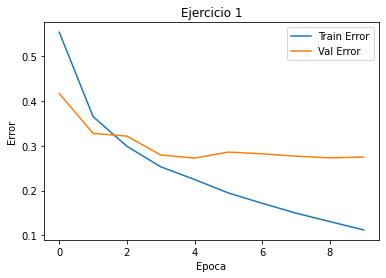

313/313 [==============================] - 1s 4ms/step - loss: 1.0379 - accuracy: 0.7221
Test error en el modelo final 0.27789998054504395


In [ ]:
# Calculamos el error a partir del accuracy para poder graficar
train_error = map(lambda x: 1 - x, history.history['accuracy'])
val_error = map(lambda x: 1 - x,  history.history['val_accuracy'])

# Graficamos
plt.plot(list(train_error), label='Train Error')
plt.plot(list(val_error), label = 'Val Error')
plt.xlabel('Epoca')
plt.ylabel('Error')
plt.legend()
plt.title('Ejercicio 1')
plt.show()

# Error de test

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

test_loss, test_acc = mdl.evaluate(test_images,  test_labels)
print(f"Test error en el modelo final {1 - test_acc}")


### Ejercicio 2 mejorado

In [ ]:
ms = []
for p in [0.2, 0.5]:

    model = tf.keras.models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.Dropout(p, input_shape=(32, 32, 3))) # Dropout
    model.add(layers.Flatten())
    model.add(layers.Dense(128))
    model.add(layers.Dropout(p, input_shape=(32, 32, 3))) # Dropout
    model.add(layers.Dense(10))

    ms.append(model)

modelos = ej2(ms)

Epoch 1/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5102 - accuracy: 0.4458 - val_loss: 1.1353 - val_accuracy: 0.6012
Epoch 2/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.0442 - accuracy: 0.6317 - val_loss: 1.0516 - val_accuracy: 0.6324
Epoch 3/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8683 - accuracy: 0.6941 - val_loss: 0.9163 - val_accuracy: 0.6766
Epoch 4/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.7493 - accuracy: 0.7365 - val_loss: 0.7962 - val_accuracy: 0.7253
Epoch 5/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.6624 - accuracy: 0.7678 - val_loss: 0.8016 - val_accuracy: 0.7207
Epoch 6/20
1250/1250 [==============================] - 10s 8ms/step - loss: 0.5904 - accuracy: 0.7918 - val_loss: 0.7855 - val_accuracy: 0.7389
Epoch 7/20
1250/1250 [==============================] - 8s 6ms/step - loss: 0.5261 - accuracy: 0.8131 - val_loss: 0.7898 - val_accuracy

### Resultados - Ejercicio 2 Mejorado

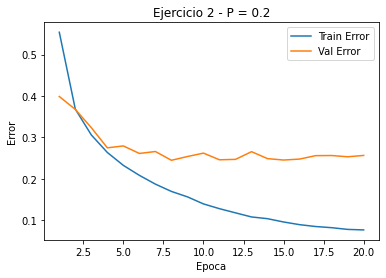

313/313 [==============================] - 1s 4ms/step - loss: 1.1525 - accuracy: 0.7387
Test error en el modelo final para p = 0.2: 0.2613000273704529


In [ ]:
graficar_resultados(history, modelos[0], 'Ejercicio 2 (mejorado) - Dropout')


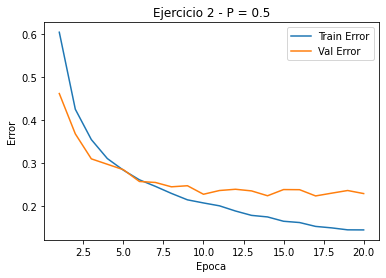

313/313 [==============================] - 1s 4ms/step - loss: 0.8133 - accuracy: 0.7678
Test error en el modelo final para p = 0.5: 0.232200026512146


In [ ]:
graficar_resultados(history, modelos[1], 'Ejercicio 2 (mejorado) - Dropout')


### Ejercicio 3 mejorado

In [9]:
img_height = 32
img_width = 32
data_augmentation = keras.Sequential(
    [
          layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
          layers.RandomRotation(0.1),
          layers.RandomZoom(0.1),
     ]
)

# Agregamos las capas
model = tf.keras.models.Sequential()
model.add(data_augmentation)
model = tf.keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.Dropout(0.5, input_shape=(32, 32, 3))) # Dropout
model.add(layers.Flatten())
model.add(layers.Dense(128))
model.add(layers.Dropout(0.5, input_shape=(32, 32, 3))) # Dropout
model.add(layers.Dense(10))

history, model = ej3(model)

Epoch 1/40
1250/1250 [==============================] - 8s 6ms/step - loss: 1.6216 - accuracy: 0.4008 - val_loss: 1.2125 - val_accuracy: 0.5661
Epoch 2/40
1250/1250 [==============================] - 7s 5ms/step - loss: 1.1714 - accuracy: 0.5835 - val_loss: 1.0758 - val_accuracy: 0.6210
Epoch 3/40
1250/1250 [==============================] - 7s 5ms/step - loss: 1.0110 - accuracy: 0.6453 - val_loss: 0.9265 - val_accuracy: 0.6779
Epoch 4/40
1250/1250 [==============================] - 7s 5ms/step - loss: 0.9052 - accuracy: 0.6831 - val_loss: 0.8262 - val_accuracy: 0.7101
Epoch 5/40
1250/1250 [==============================] - 7s 5ms/step - loss: 0.8246 - accuracy: 0.7112 - val_loss: 0.8258 - val_accuracy: 0.7119
Epoch 6/40
1250/1250 [==============================] - 7s 6ms/step - loss: 0.7671 - accuracy: 0.7319 - val_loss: 0.7596 - val_accuracy: 0.7357
Epoch 7/40
1250/1250 [==============================] - 7s 6ms/step - loss: 0.7142 - accuracy: 0.7513 - val_loss: 0.7891 - val_accuracy:

### Resultados - Ejercicio 3 mejorado

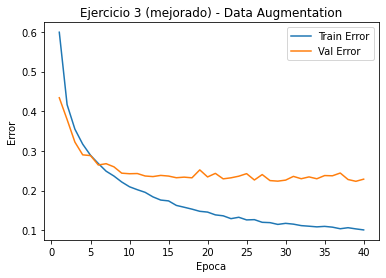

313/313 [==============================] - 1s 4ms/step - loss: 0.9131 - accuracy: 0.7676
Test error en el modelo final: 0.23240000009536743


In [10]:
graficar_resultados(history, model, 'Ejercicio 3 (mejorado) - Data Augmentation')

### Conclusiones

se pudooooooooooooooooooooooooooooooooooooo

## Ejercicio 5

In [ ]:
def ej5():
  img_height = 32
  img_width = 32
  data_augmentation = keras.Sequential(
      [
            layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
            layers.RandomRotation(0.1),
            layers.RandomZoom(0.1),
            layers.RandomContrast(0.1),
            # tf.keras.layers.RandomBrightness(0.3),
      ]
  )

  # Agregamos las capas
  model = models.Sequential()
  model.add(data_augmentation)
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(layers.Dropout(0.5, input_shape=(32, 32, 3))) # Dropout
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(64))
  model.add(layers.Dropout(0.5, input_shape=(32, 32, 3))) # Dropout
  model.add(layers.Dense(128))
  model.add(layers.Dense(128))
  model.add(layers.Dense(10))

  (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

  # Normalizamos como lo hace el ejemplo del tutorial
  train_images, test_images = train_images / 255.0, test_images / 255.0


  # Separamos conjunto de validación
  train_images, val_images, train_labels, val_labels = train_test_split(
      train_images, train_labels, test_size=0.2, random_state=0
  )

  # Compilamos y entrenamos

  model.compile(
      optimizer='adam',
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy']
  )

  history = model.fit(
      train_images, 
      train_labels, 
      epochs=20,
      validation_data=(val_images, val_labels)
  )

  return history, model

In [ ]:
history, model = ej5()

Epoch 1/20
1250/1250 [==============================] - 9s 6ms/step - loss: 1.7764 - accuracy: 0.3418 - val_loss: 1.4822 - val_accuracy: 0.4618
Epoch 2/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5344 - accuracy: 0.4363 - val_loss: 1.4583 - val_accuracy: 0.4653
Epoch 3/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.4411 - accuracy: 0.4726 - val_loss: 1.2984 - val_accuracy: 0.5314
Epoch 4/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.3758 - accuracy: 0.5049 - val_loss: 1.2013 - val_accuracy: 0.5688
Epoch 5/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3260 - accuracy: 0.5282 - val_loss: 1.2007 - val_accuracy: 0.5901
Epoch 6/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.2855 - accuracy: 0.5442 - val_loss: 1.1387 - val_accuracy: 0.6022
Epoch 7/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.2549 - accuracy: 0.5530 - val_loss: 1.1166 - val_accuracy:

### Resultados

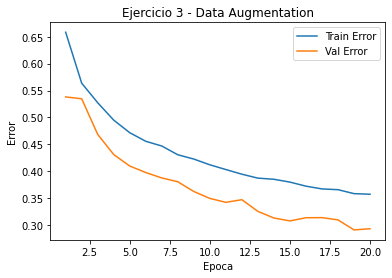

313/313 [==============================] - 1s 3ms/step - loss: 0.8988 - accuracy: 0.6954
Test error en el modelo final: 0.3046000003814697


In [ ]:
# Calculamos el error a partir del accuracy para poder graficar
train_error = map(lambda x: 1 - x, history.history['accuracy'])
val_error = map(lambda x: 1 - x,  history.history['val_accuracy'])

# Graficamos
plt.plot(range(1, 21), list(train_error), label='Train Error')
plt.plot(range(1, 21), list(val_error), label = 'Val Error')
plt.xlabel('Epoca')
plt.ylabel('Error')
plt.legend()
plt.title('Ejercicio 3 - Data Augmentation')
plt.show()

# Error de test

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
test_loss, test_acc = model.evaluate(test_images,  test_labels)
print(f"Test error en el modelo final: {1 - test_acc}")

### Conclusiones

no hace mucha diferencia, no se pueden aplicar transformaciones que modifiquen el tamaño de la imagen porq se vuelve todo loco